In [353]:
import numpy as np
import pandas as pd
import random as rd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics.pairwise import pairwise_distances



In [354]:
df=pd.read_csv('CC General.csv')

In [355]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [356]:
df.isna().mean()*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [357]:
df.drop(["CUST_ID"],axis=1,inplace=True)
df.dropna(subset=["CREDIT_LIMIT"],inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [358]:
x1 = df["PURCHASES"].to_list()
x2 = df["CREDIT_LIMIT"].to_list()
import numpy
mydata=[]
for i in range(len(x1)):
    mydata.append([x1[i],x2[i]])
mydata = numpy.array(mydata)

In [359]:
def hclust(data,linkage,k):  
    dist_mat = pairwise_distances(data,metric='euclidean')
    np.fill_diagonal(dist_mat,float("inf"))
    clusters = return_clusters(dist_mat,linkage) 
    iter_no = dist_mat.shape[0] - k
    clusters_plt= clusters[iter_no]
    print(clusters_plt)
    temp= np.unique(clusters_plt)
    colour_options = ['r','g','b']
    
    plot_index=[]
    plt.figure(figsize=(10,8))
    for x in np.nditer(temp):
        plot_index.append(np.where(clusters_plt==x))
    p=0
    
    for i in range(0,len(plot_index)):
        for j in np.nditer(plot_index[i]):
               plt.scatter(data[j,0],data[j,1], c= colour_options[p])
        p = p + 1
    plt.show()

  


In [360]:
def return_clusters(dist_mat,linkage):
    my_clusters = [0]*len(dist_mat)
    r,c = -1,-1
    rows = [i for i in range(dist_mat.shape[0])]
    my_clusters[0] = rows

    for k in range(1, dist_mat.shape[0]):
        minimum = dist_mat[0][0] 

        for i in range(dist_mat.shape[0]):
            for j in range(dist_mat.shape[1]):
                if(dist_mat[i][j]<=minimum):
                    minimum = dist_mat[i][j]
                    r,c = i,j
                            
        
        if(linkage.upper() == "SINGLE"):
            for i in range(dist_mat.shape[0]):
                if(i!=c):
                    t = min(dist_mat[c][i],dist_mat[r][i])
                    dist_mat[c][i] = t
                    dist_mat[i][c] = t
               
        elif(linkage.upper() =="AVERAGE"):
             for i in range(dist_mat.shape[0]):
                if(i!=r & i!=c):
                    t = (dist_mat[c][i]+dist_mat[r][i])/2
                    dist_mat[c][i] = t
                    dist_mat[i][c] = t
        
        elif(linkage.upper() == "COMPLETE"):
             for i in range(dist_mat.shape[0]):
                if(i!=r & i!=c):
                    t = max(dist_mat[c][i],dist_mat[r][i])
                    dist_mat[c][i] = t
                    dist_mat[i][c] = t
                   
        for i in range(dist_mat.shape[0]):
            dist_mat[r][i] = float("inf")
            dist_mat[i][r] = float("inf")
              
        for i in range(len(rows)):
            if(rows[i] == max(r,c)):
                rows[i] = min(r,c)

        my_clusters[k] = rows.copy()
        
    return my_clusters

[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


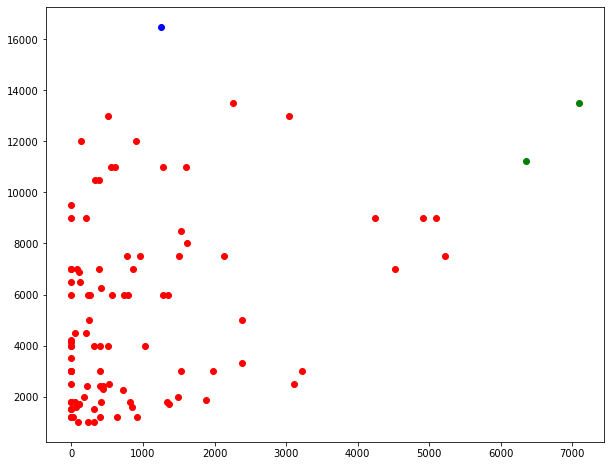

In [361]:
hclust(mydata[:100],"single",3)



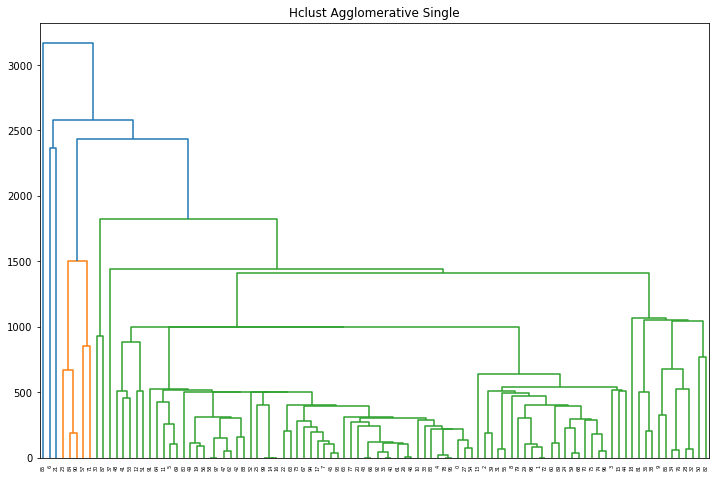

In [362]:
import scipy.cluster.hierarchy as ch
plt.figure(figsize=(12,8))
plt.title("Hclust Agglomerative Single")
dend = ch.dendrogram(ch.linkage(mydata[:100], method='single'))


In [363]:
v =[1,2,3]
for i in range(0,len(v)):
    print(i)

0
1
2


[0, 1, 1, 1, 0, 0, 6, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]


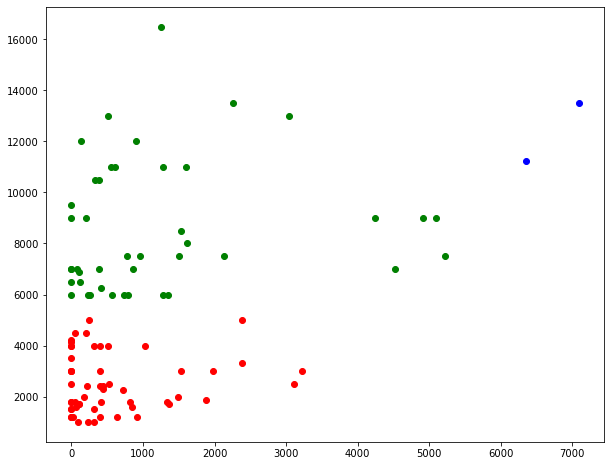

None


In [364]:
s=hclust(mydata[:100],"average",3)
print(s)

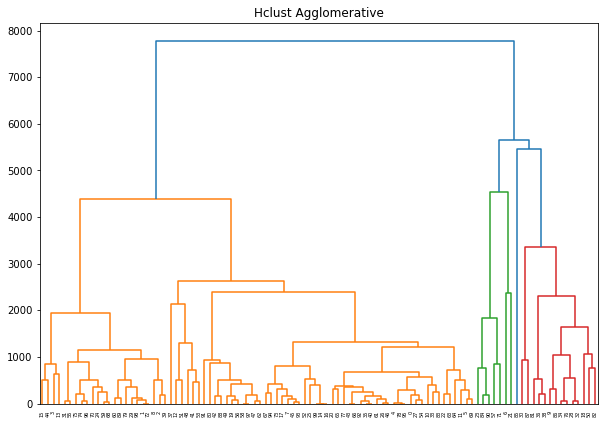

In [365]:
plt.figure(figsize=(10,7))
plt.title("Hclust Agglomerative")
dend = ch.dendrogram(ch.linkage(mydata[:100], method='average'))

[0, 0, 0, 0, 0, 0, 6, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 6, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


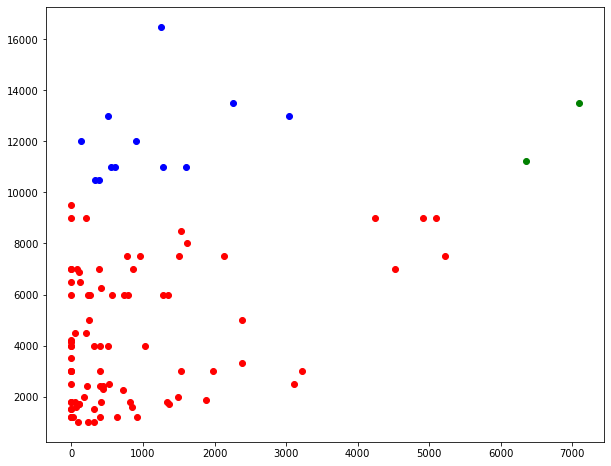

None


In [366]:
n=hclust(mydata[:100],"complete",3)
print(n)

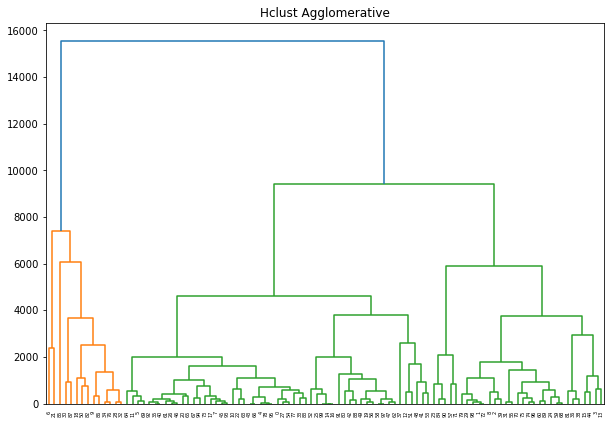

In [352]:
plt.figure(figsize=(10,7))
plt.title("Hclust Agglomerative")
dend = ch.dendrogram(ch.linkage(mydata[:100], method='complete'))